# Compare Compute Time for CP-APR Implementations

In [1]:
MAX_EPOCH = 10
MAX_RANK = 21
MAX_DIMS = 5 # Dimensions 3 to MAX_DIMS

In [2]:
from pyCP_APR import CP_APR
import scipy.io as spio
import numpy as np

## Form Tensors

In [3]:
import torch
import scipy.io
import numpy as np

tensors = dict()

for ii in range(3, MAX_DIMS+1):
    X = np.random.randint(2, size=tuple([10] * ii))
    
    coords = np.argwhere(X != 0)
    values = X[np.nonzero(X)]
    
    subs = torch.LongTensor(coords)
    vals = torch.FloatTensor(values)
    X_torch = torch.sparse.FloatTensor(subs.t(), vals)
    
    tensors['X_'+str(ii)] = X
    tensors['coords_'+str(ii)] = coords
    tensors['values_'+str(ii)] = values
    tensors['X_torch'+str(ii)] = X_torch 

In [4]:
from tqdm import tqdm
run_times = dict()

## Run CP-APR Numpy Dense

In [5]:
for ii in range(3, MAX_DIMS+1):
    X = tensors['X_' + str(ii)]

    dense_tensor_times = list()

    cp_apr = CP_APR(n_iters=MAX_EPOCH, verbose=0, method='numpy')

    for rank in tqdm(range(1, MAX_RANK)):

        _ = cp_apr.fit(tensor=X, Type='tensor', rank=rank)
        dense_tensor_times.append(cp_apr.model.exec_time)
        
    run_times['numpy_dense_' + str(ii)] = dense_tensor_times
    del cp_apr

100%|██████████| 20/20 [01:25<00:00,  4.29s/it]


## RUN CP-APR Numpy Sparse 

In [6]:
for ii in range(3, MAX_DIMS+1):
    
    coords = tensors['coords_' + str(ii)]
    values = tensors['values_' + str(ii)]

    sparse_tensor_times = list()

    cp_apr = CP_APR(n_iters=MAX_EPOCH, verbose=0, method='numpy')

    for rank in tqdm(range(1, MAX_RANK)):

        _ = cp_apr.fit(coords=coords, values=values, rank=rank)
        sparse_tensor_times.append(cp_apr.model.exec_time)
        
    run_times['numpy_sparse_' + str(ii)] = sparse_tensor_times
    del cp_apr

100%|██████████| 20/20 [01:14<00:00,  3.74s/it]


## Run CP-APR PyTorch CPU

In [8]:
for ii in range(3, MAX_DIMS+1):
    
    coords = tensors['coords_' + str(ii)]
    values = tensors['values_' + str(ii)]
    
    sparse_pytorch_cpu_times = list()

    cp_apr = CP_APR(n_iters=MAX_EPOCH, verbose=0, method='torch', device='cpu')

    for rank in tqdm(range(1, MAX_RANK)):

        _ = cp_apr.fit(coords=coords, values=values, rank=rank)
        sparse_pytorch_cpu_times.append(cp_apr.model.exec_time)
    
    run_times['numpy_sparse_cpu_' + str(ii)] = sparse_pytorch_cpu_times
    del cp_apr

100%|██████████| 20/20 [05:46<00:00, 17.31s/it]


## Run CP-APR PyTorch GPU

In [9]:
for ii in range(3, MAX_DIMS+1):
    
    coords = tensors['coords_' + str(ii)]
    values = tensors['values_' + str(ii)]
    
    sparse_pytorch_gpu_times = list()

    cp_apr = CP_APR(n_iters=MAX_EPOCH, verbose=0, device='gpu', method='torch')

    for rank in tqdm(range(1, MAX_RANK)):

        _ = cp_apr.fit(coords=coords, values=values, rank=rank)
        sparse_pytorch_gpu_times.append(cp_apr.model.exec_time)
        
    run_times['numpy_sparse_gpu_' + str(ii)] = sparse_pytorch_gpu_times
    del cp_apr

100%|██████████| 20/20 [00:45<00:00,  2.28s/it]


# Plot

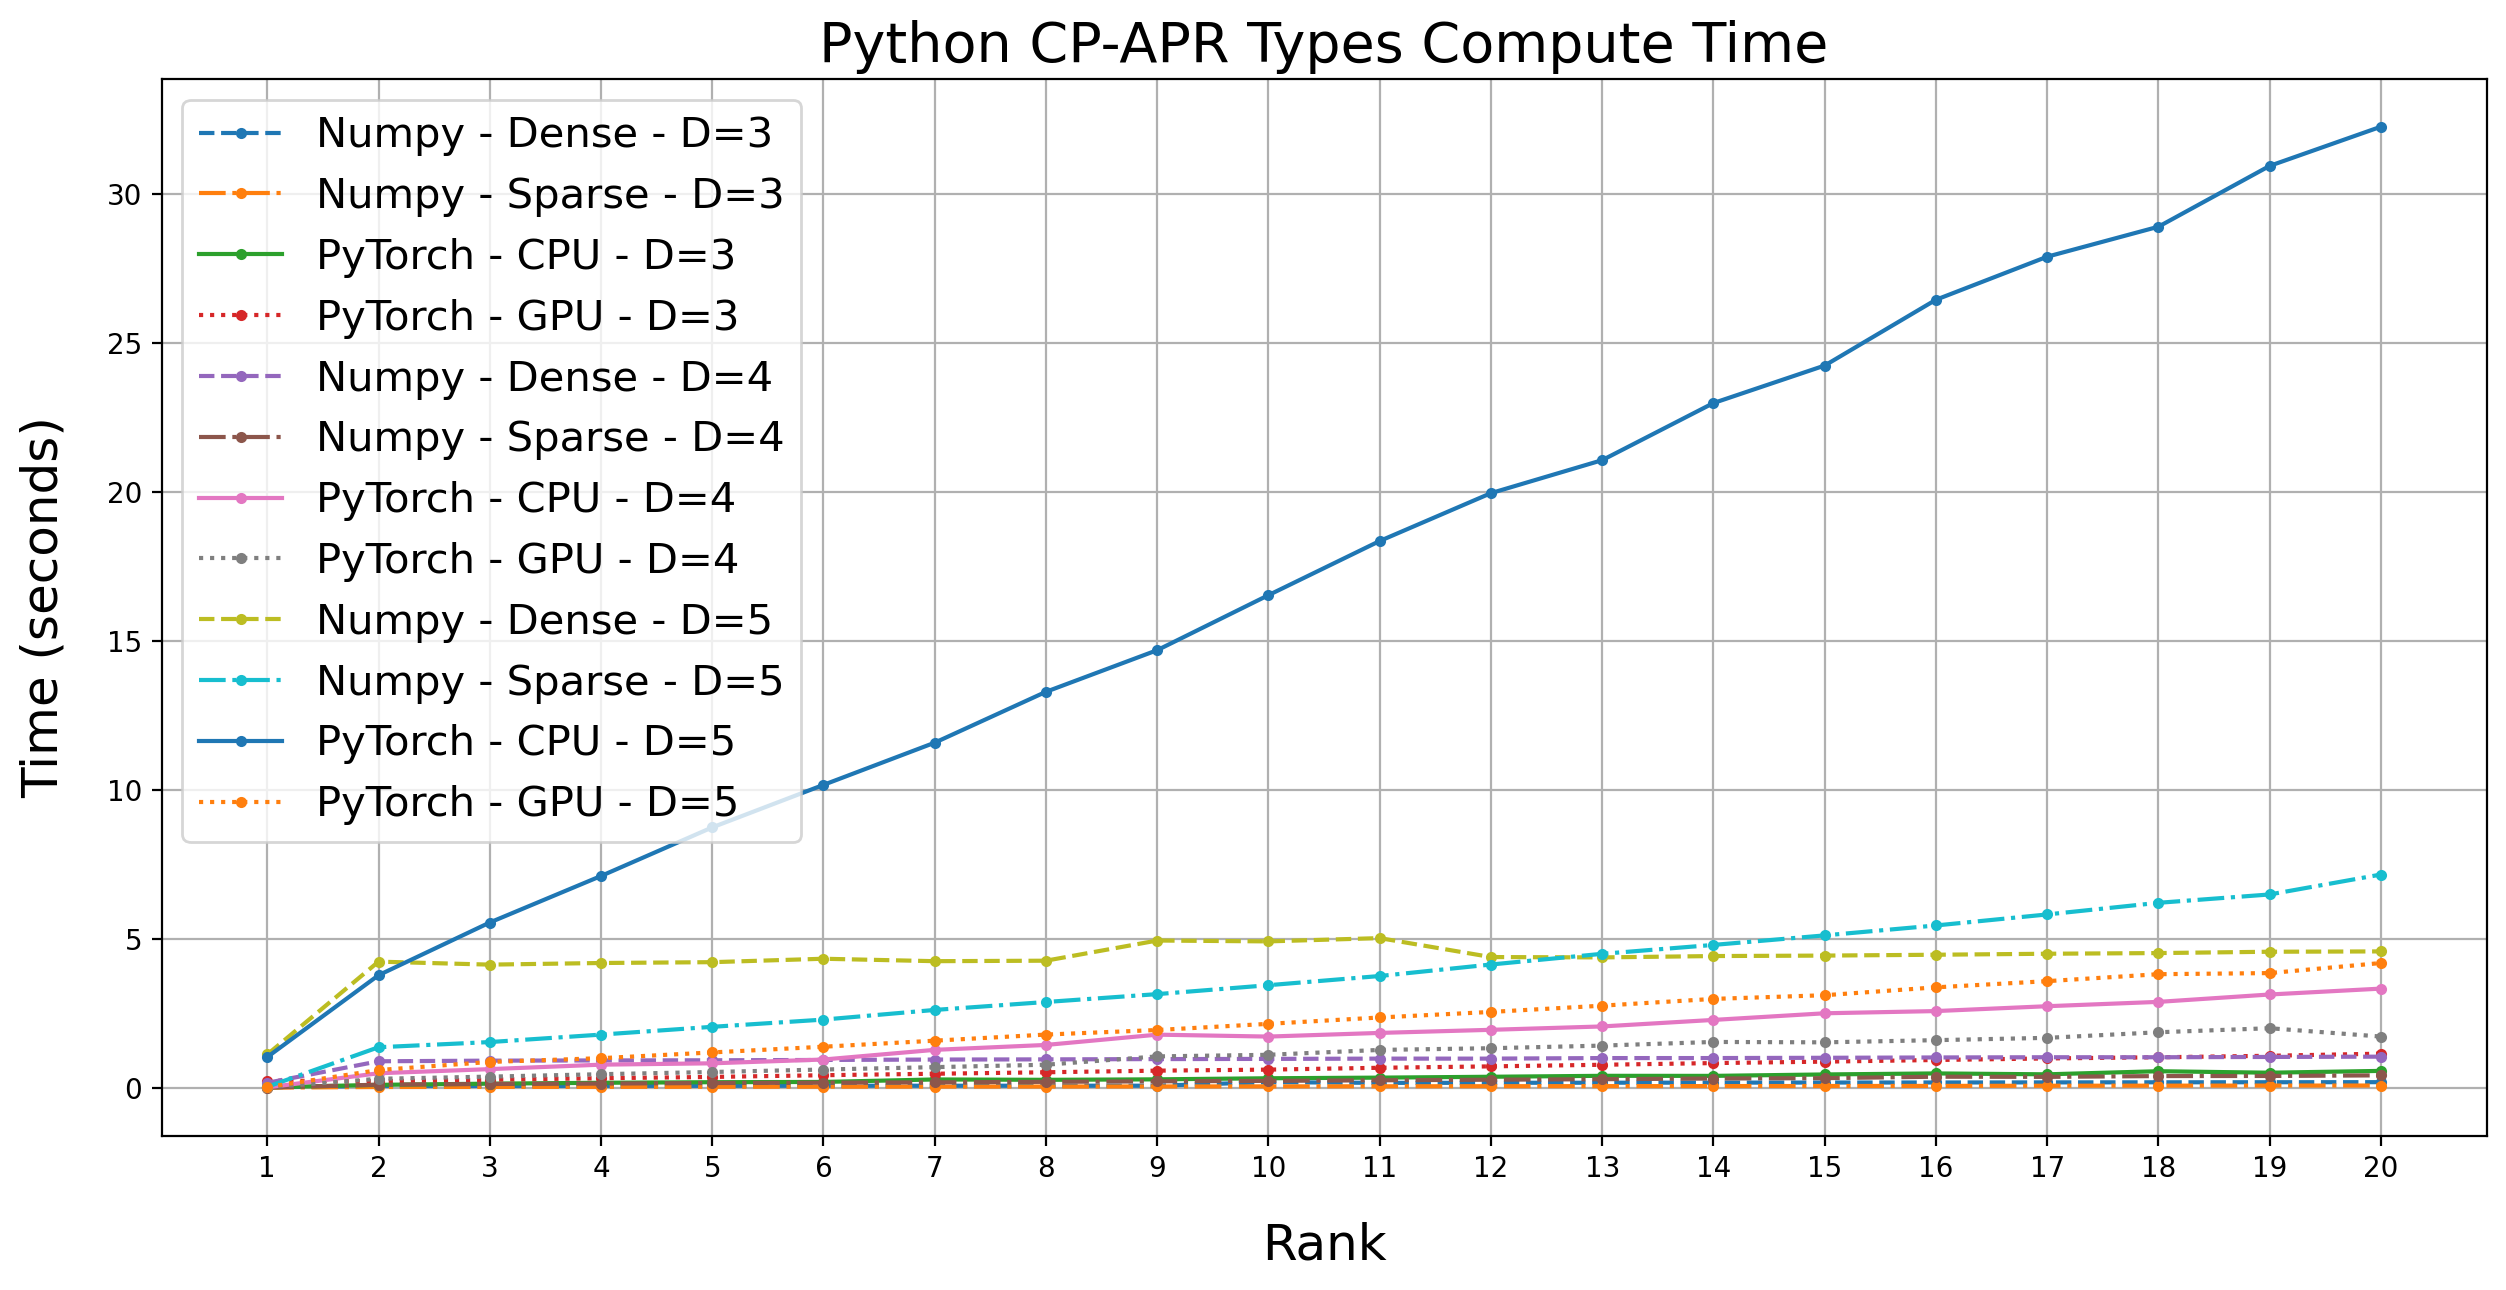

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 

x = range(1, MAX_RANK)

plt.figure(figsize=(15,7), dpi=200)

for ii in range(3, MAX_DIMS+1):

    plt.plot(x, run_times['numpy_dense_' + str(ii)], marker='o', linestyle='--', markersize=3,  label='Numpy - Dense - D=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_' + str(ii)], marker='o', linestyle='-.', markersize=3, label='Numpy - Sparse - D=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_cpu_' + str(ii)], marker='o', linestyle='-', markersize=3, label='PyTorch - CPU - D=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_gpu_' + str(ii)], marker='o', linestyle=':', markersize=3, label='PyTorch - GPU - D=' + str(ii))

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Rank', fontsize=18, labelpad=14)
plt.ylabel('Time (seconds)', fontsize=18, labelpad=14)
plt.title('Python CP-APR Types Compute Time', fontsize=20)
plt.legend(loc="upper left", prop={'size': 15})
plt.grid(True)

plt.show()

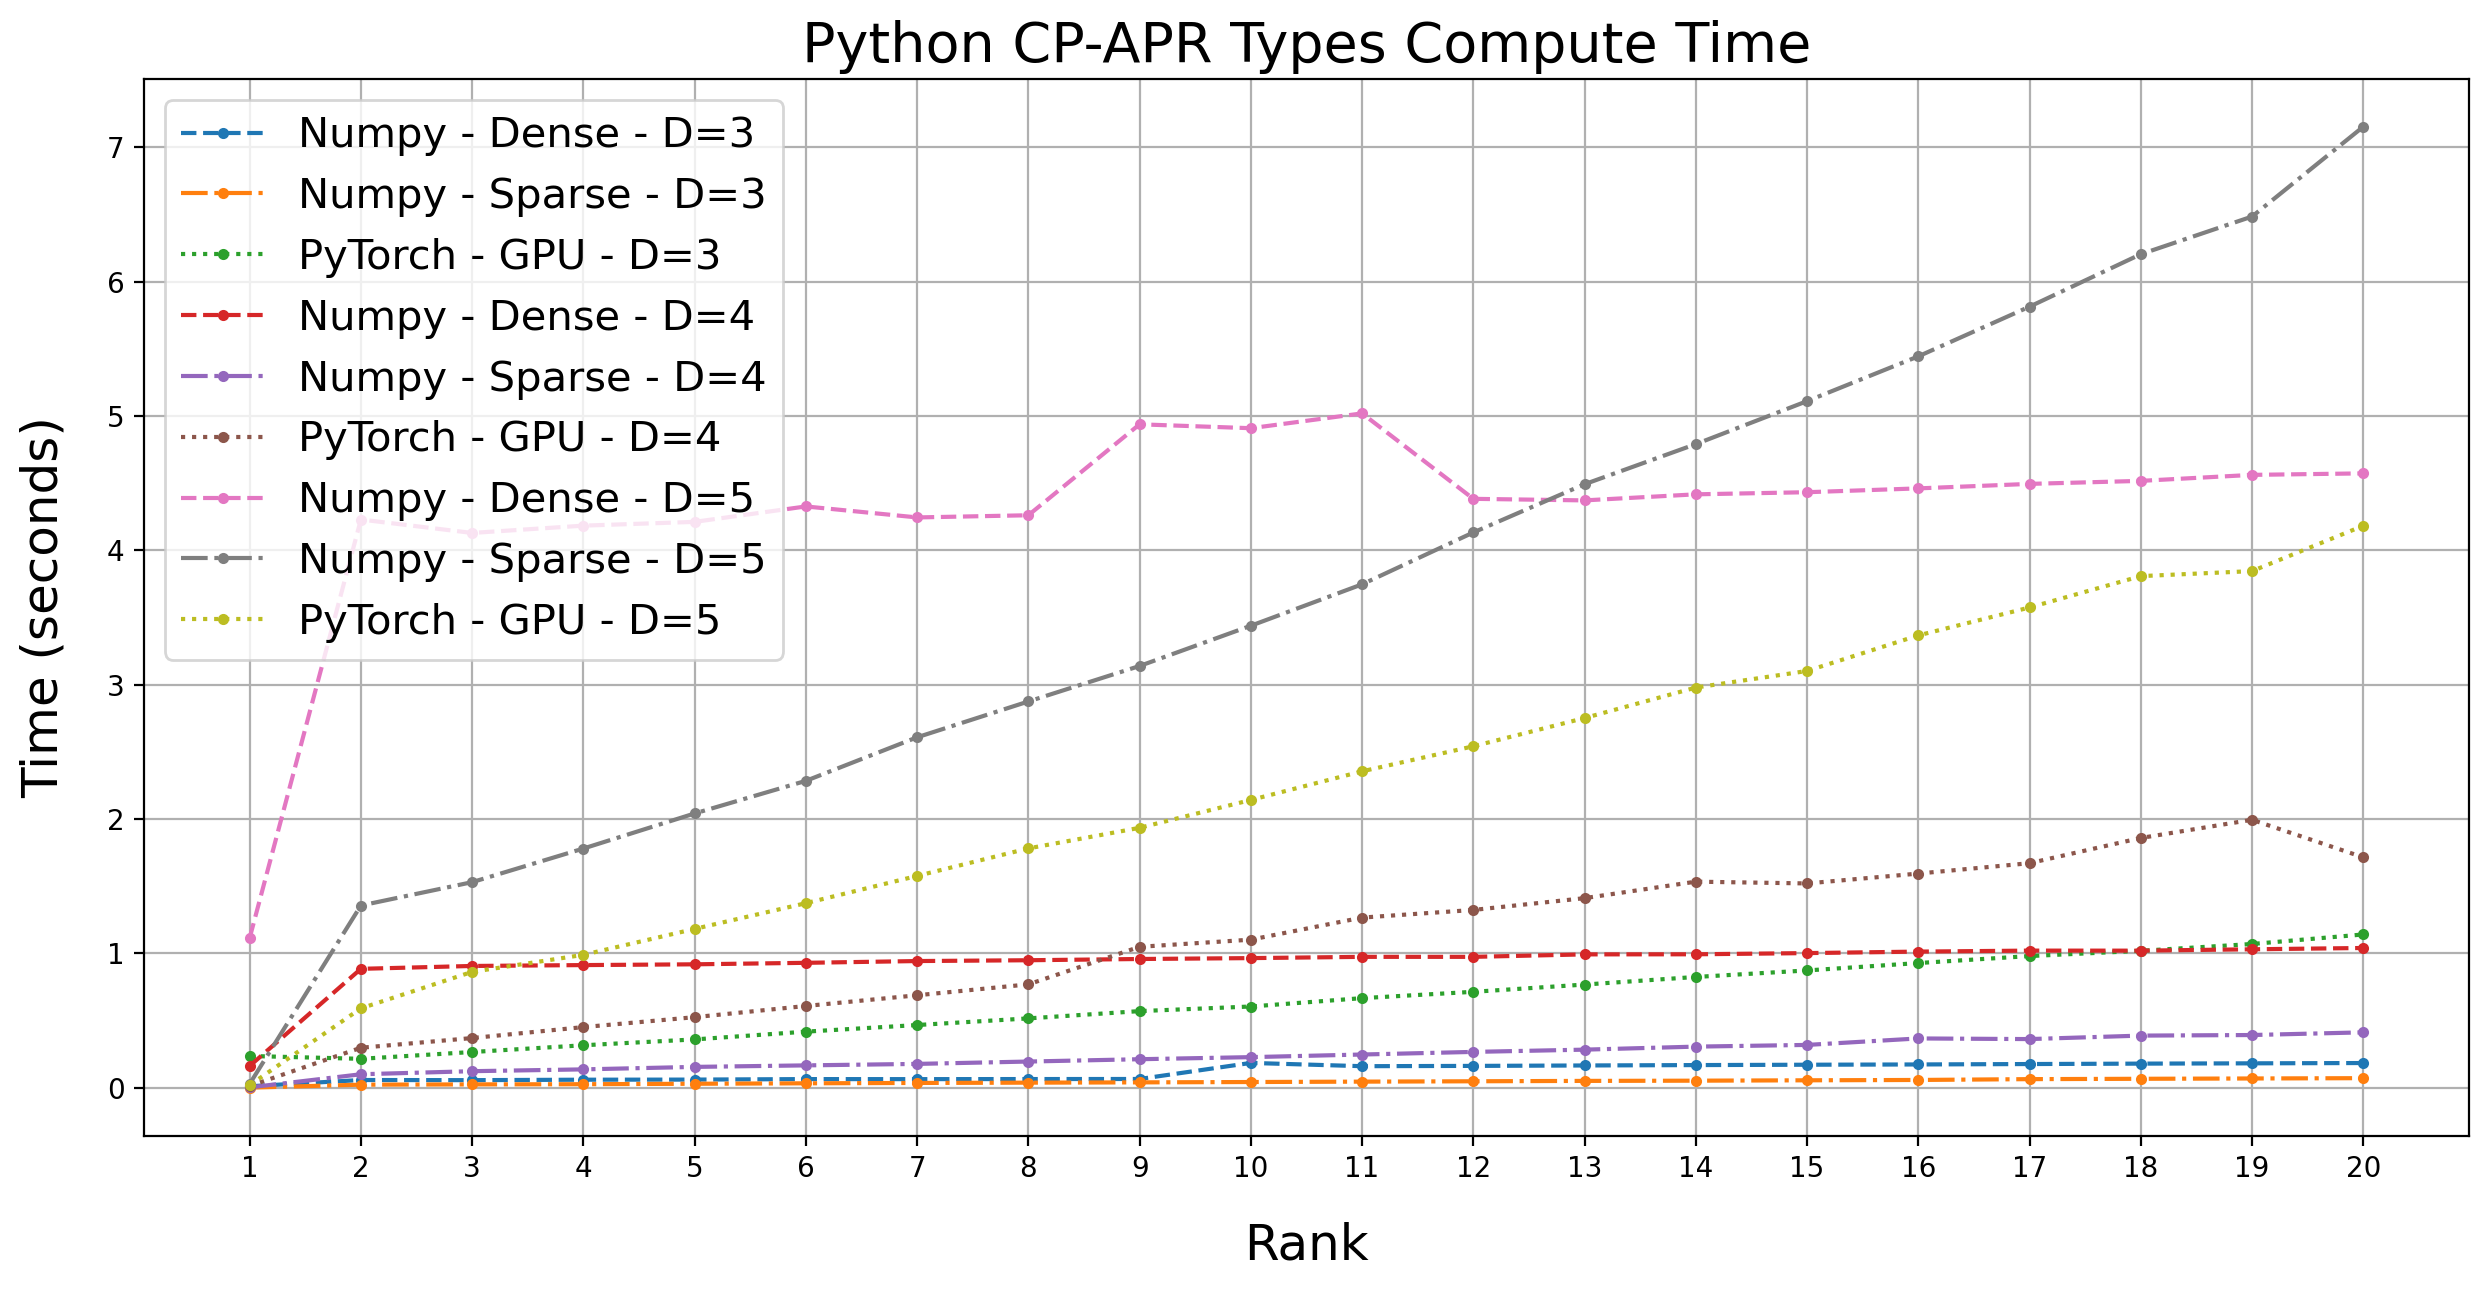

In [11]:
x = range(1, MAX_RANK)

plt.figure(figsize=(15,7), dpi=200)

for ii in range(3, MAX_DIMS+1):

    plt.plot(x, run_times['numpy_dense_' + str(ii)], marker='o', linestyle='--', markersize=3,  label='Numpy - Dense - D=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_' + str(ii)], marker='o', linestyle='-.', markersize=3, label='Numpy - Sparse - D=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_cpu_' + str(ii)], marker='o', linestyle='-', markersize=3, label='PyTorch - CPU - R=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_gpu_' + str(ii)], marker='o', linestyle=':', markersize=3, label='PyTorch - GPU - D=' + str(ii))

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Rank', fontsize=18, labelpad=14)
plt.ylabel('Time (seconds)', fontsize=18, labelpad=14)
plt.title('Python CP-APR Types Compute Time', fontsize=20)
plt.legend(loc="upper left", prop={'size': 15})
plt.grid(True)

plt.show()

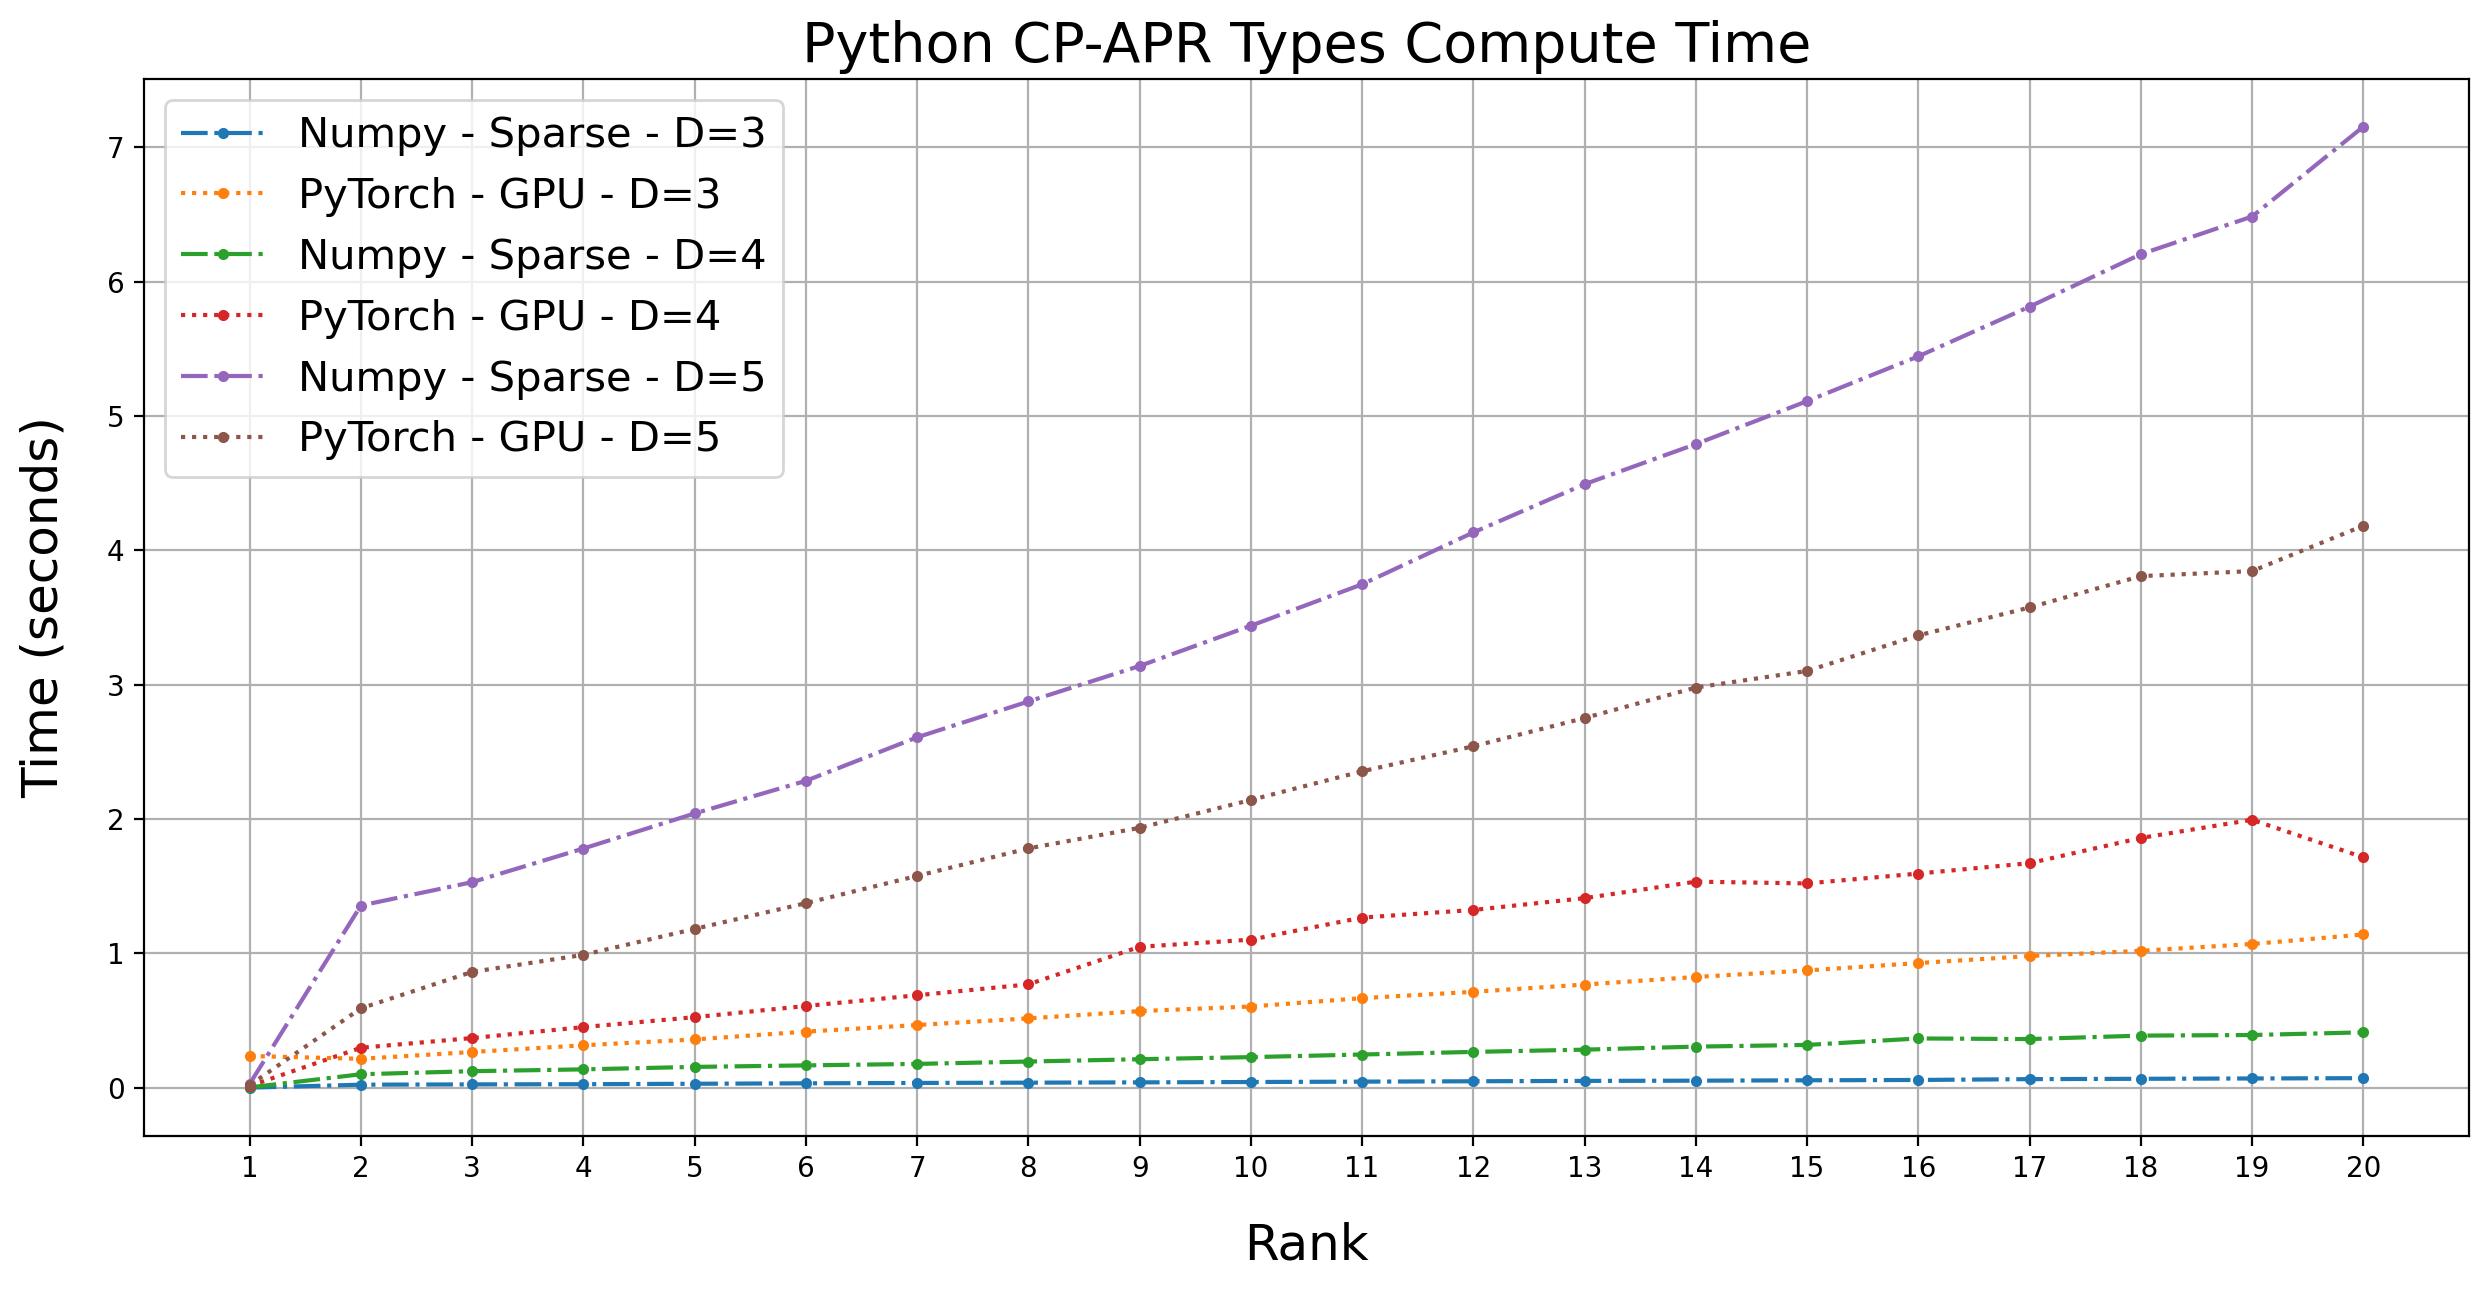

In [12]:
x = range(1, MAX_RANK)

plt.figure(figsize=(15,7), dpi=200)

for ii in range(3, MAX_DIMS+1):

    plt.plot(x, run_times['numpy_dense_' + str(ii)], marker='o', linestyle='--', markersize=3,  label='Numpy - Dense - R=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_' + str(ii)], marker='o', linestyle='-.', markersize=3, label='Numpy - Sparse - D=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_cpu_' + str(ii)], marker='o', linestyle='-', markersize=3, label='PyTorch - CPU - R=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_gpu_' + str(ii)], marker='o', linestyle=':', markersize=3, label='PyTorch - GPU - D=' + str(ii))

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Rank', fontsize=18, labelpad=14)
plt.ylabel('Time (seconds)', fontsize=18, labelpad=14)
plt.title('Python CP-APR Types Compute Time', fontsize=20)
plt.legend(loc="upper left", prop={'size': 15})
plt.grid(True)

plt.show()

In [13]:
# matlab runtimes
t = spio.loadmat('../data/test_data/matlab_cp-apr_times.mat', squeeze_me=True)
matlab = t['out']

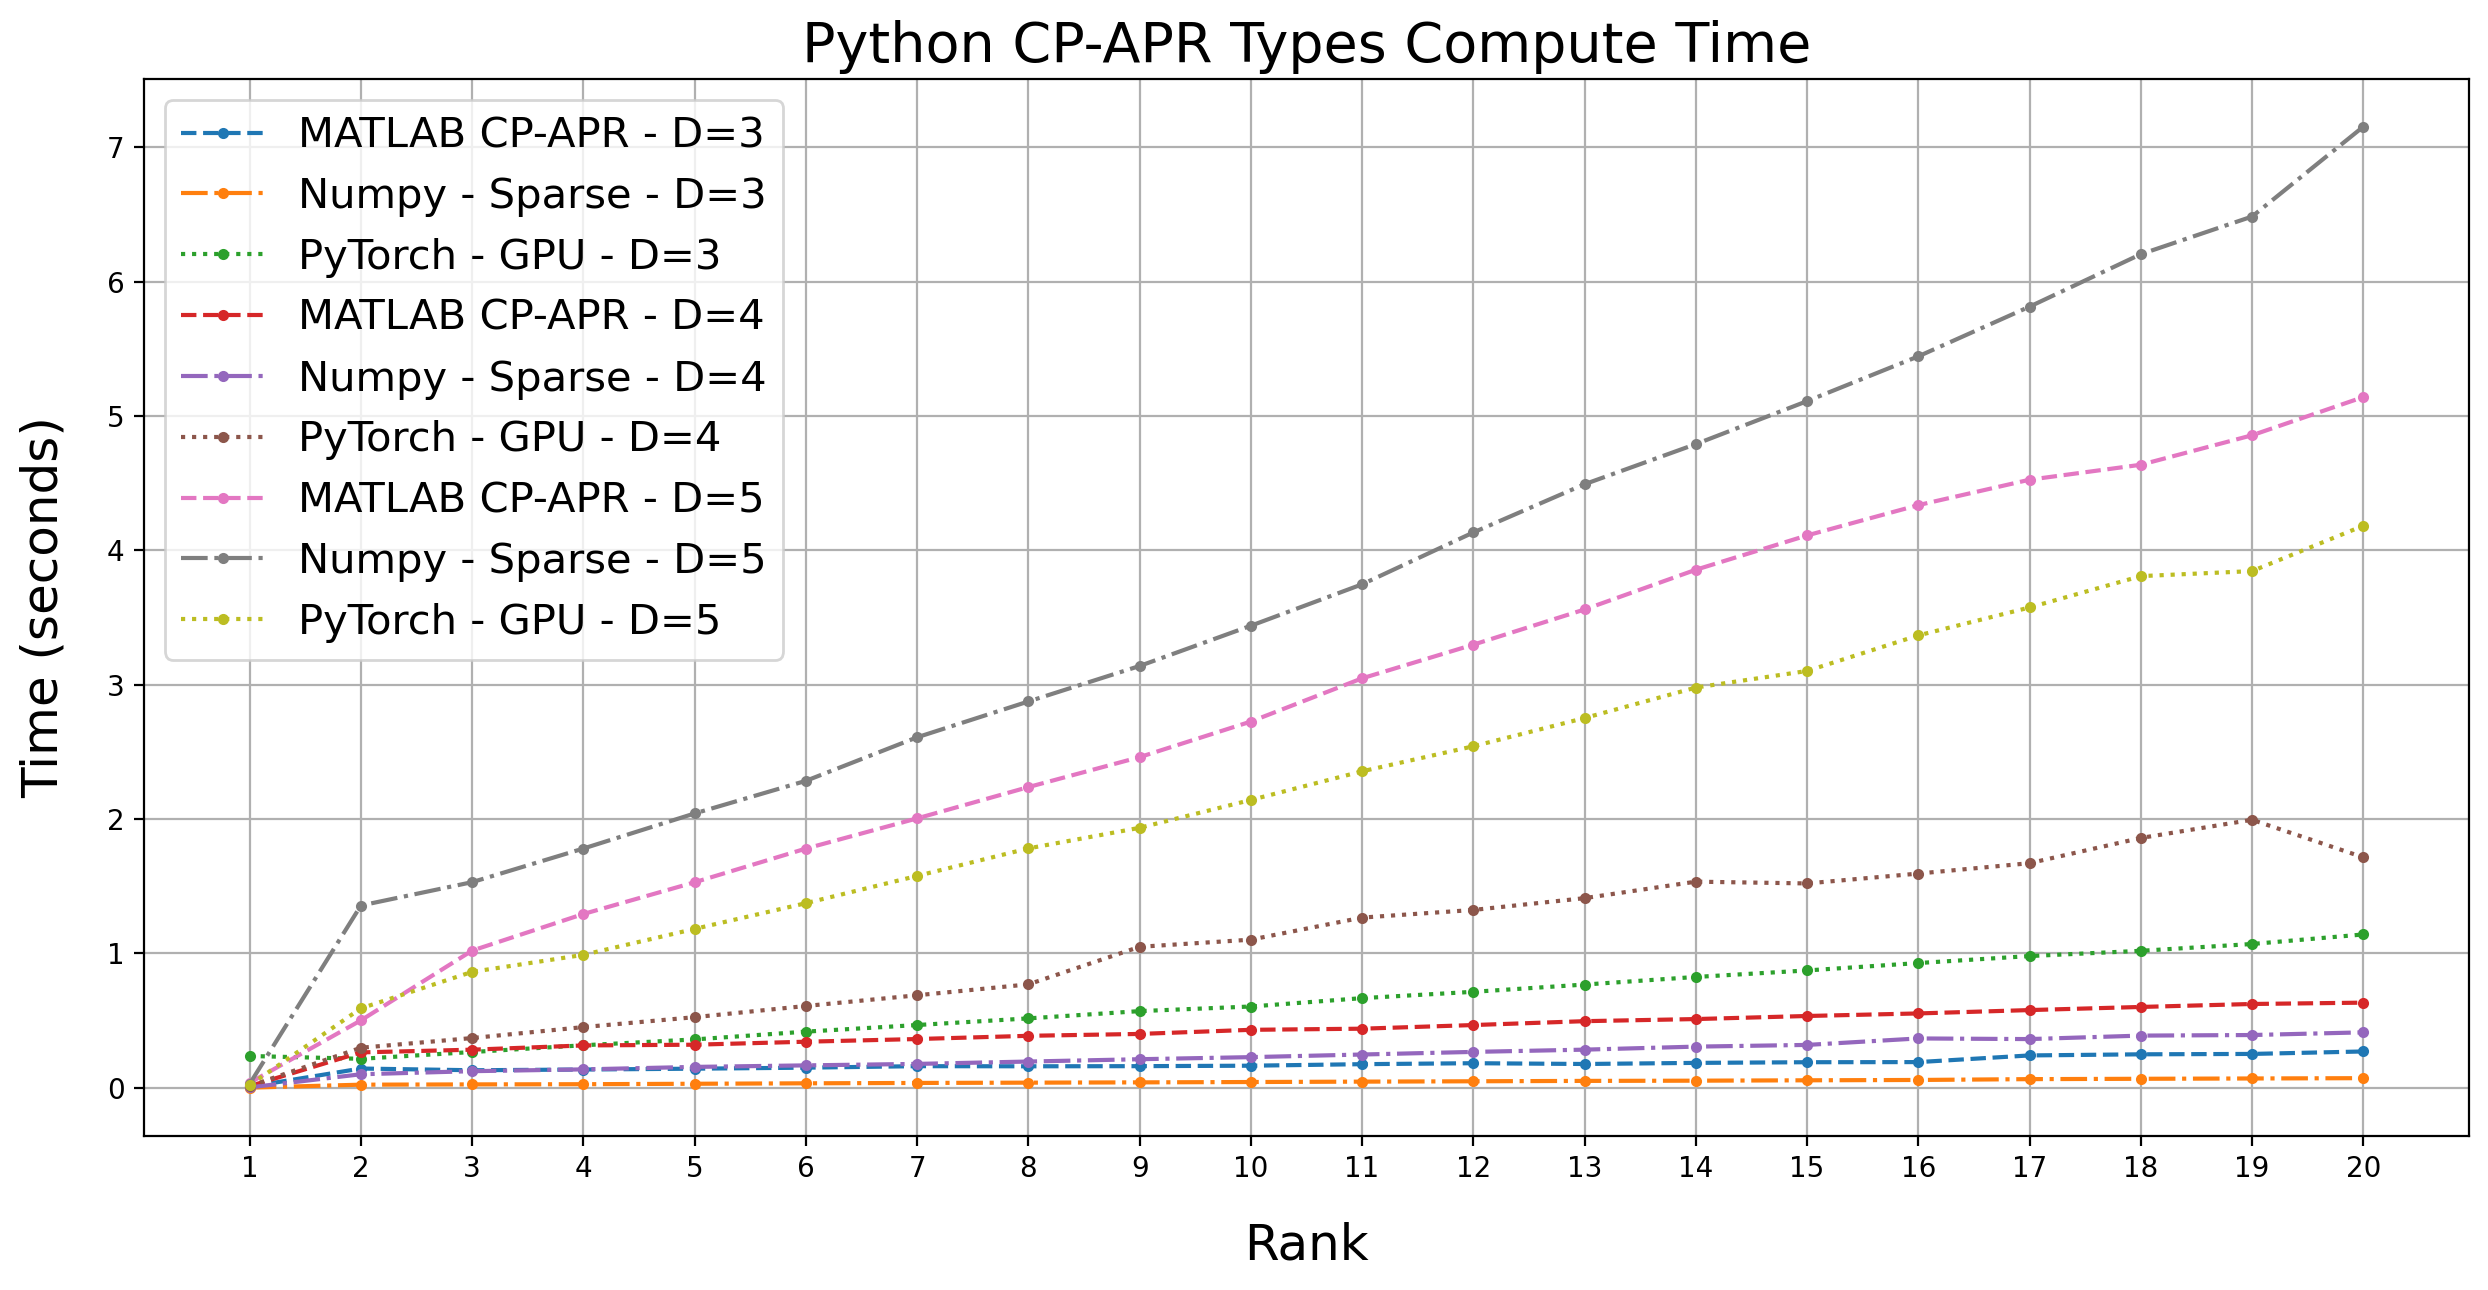

In [14]:
x = range(1, MAX_RANK)

plt.figure(figsize=(15,7), dpi=200)

dim = 0
for ii in range(3, MAX_DIMS+1):
    plt.plot(x, matlab[dim,:], marker='o', linestyle='--', markersize=3,  label='MATLAB CP-APR - D=' + str(ii))
    #plt.plot(x, run_times['numpy_dense_' + str(ii)], marker='o', linestyle='--', markersize=3,  label='Numpy - Dense - R=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_' + str(ii)], marker='o', linestyle='-.', markersize=3, label='Numpy - Sparse - D=' + str(ii))
    #plt.plot(x, run_times['numpy_sparse_cpu_' + str(ii)], marker='o', linestyle='-', markersize=3, label='PyTorch - CPU - R=' + str(ii))
    plt.plot(x, run_times['numpy_sparse_gpu_' + str(ii)], marker='o', linestyle=':', markersize=3, label='PyTorch - GPU - D=' + str(ii))
    
    dim+=1

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Rank', fontsize=18, labelpad=14)
plt.ylabel('Time (seconds)', fontsize=18, labelpad=14)
plt.title('Python CP-APR Types Compute Time', fontsize=20)
plt.legend(loc="upper left", prop={'size': 15})
plt.grid(True)

plt.show()